#                                      Spotify Recommendation

In [ ]:
import pandas as pd
import csv
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Reading the data file ##
Here we are reading the data.csv file and storing this data in "values"

In [2]:
data = pd.read_csv("SpotifyFeatures.csv")
features_names = ['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','popularity','speechiness','tempo']
values = data[features_names]
print(values)

print(np.shape(values))
print(type(values))
values=np.array(values)
print(type(values))
print(values)
print(np.shape(values))

        valence  acousticness  danceability  duration_ms  energy  \
0         0.814       0.61100         0.389        99373   0.910   
1         0.816       0.24600         0.590       137373   0.737   
2         0.368       0.95200         0.663       170267   0.131   
3         0.227       0.70300         0.240       152427   0.326   
4         0.390       0.95000         0.331        82625   0.225   
...         ...           ...           ...          ...     ...   
232720    0.962       0.00384         0.687       326240   0.714   
232721    0.969       0.03290         0.785       282447   0.683   
232722    0.813       0.90100         0.517       166960   0.419   
232723    0.489       0.26200         0.745       222442   0.704   
232724    0.479       0.09730         0.758       323027   0.470   

        instrumentalness  liveness  loudness  popularity  speechiness    tempo  
0               0.000000    0.3460    -1.828           0       0.0525  166.969  
1               0.000

### Normalizing the data
To perform clustering we are normalizing the data and storing the normalized vectors in "features"

In [3]:
features = StandardScaler().fit_transform(values)
print(features[170652])
print(features)

[-0.37266408  1.16820117  0.28897236  1.98581883  1.0705522  -0.48981852
  3.78263252 -0.29627511 -1.05154473  4.44288639 -0.72176123]
[[ 1.38074423  0.6833763  -0.89093479 ... -2.26100656 -0.36796995
   1.5956073 ]
 [ 1.38843461 -0.34546718  0.19199369 ... -2.20603102 -0.18308213
   1.82325339]
 [-0.33421214  1.6445698   0.58529607 ... -2.09607995 -0.45583209
  -0.5883258 ]
 ...
 [ 1.37689903  1.50081358 -0.20130869 ...  0.32284371  0.14680516
  -1.08520529]
 [ 0.13105629 -0.30036719  1.02708778 ...  0.1579171   0.13602453
  -0.57075233]
 [ 0.09260435 -0.7646152   1.09712793 ... -0.33686274 -0.49625945
  -0.12199762]]


### Actual Labels
Assigning actual labels based on genre

In [4]:
genres = data['genre']
distinct_genres = np.unique(genres)
print(genres)
actual_lab = []
for i in range(len(features)):
  for j in range(len(distinct_genres)):
     if genres[i] == distinct_genres[j]:
       actual_lab.append(j)
       break
print(len(actual_lab))
print(len(distinct_genres))

0         Movie
1         Movie
2         Movie
3         Movie
4         Movie
          ...  
232720     Soul
232721     Soul
232722     Soul
232723     Soul
232724     Soul
Name: genre, Length: 232725, dtype: object
232725
27


# K-means Clustering

Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

We plotted the graph "Objective function vs k"

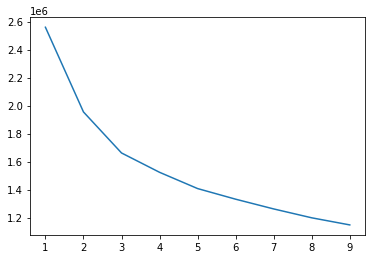

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(1,10):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(features)
 sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

### 3-D Scatter Plot

Plotting the 3-D graph between 2 feature vectors and kmeans labels

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[:,0],features[:,1],kmeans.labels_,c=kmeans.labels_,s = 0.1)
plt.title("simple 3D scatter plot")
plt.show()
print(kmeans.labels_[1])
print(kmeans.labels_[17700])

### Computation of Homogeneity Score 

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

In [ ]:
range_n_clusters = [x for x in range(30,35)]
homogeneity_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(features)
 cluster_labels = kmeans.predict(features)
 
 # homogeneity score
 homogeneity_avg.append(homogeneity_score(actual_lab, cluster_labels))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range_n_clusters,homogeneity_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Homogeneity score') 
plt.title('Homogeneity analysis For Optimal k')
plt.show()

### Silhouette Analysis for optimal k

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
range_n_clusters = [26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(features)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(features, cluster_labels))

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Fuzzy C-means Clustering

In [ ]:
pip install fuzzy-c-means

### Cluster Assignment

In [ ]:
from fcmeans import FCM
my_model = FCM(n_clusters=3)
my_model.fit(features)

### 3-D Scatter Plot

Plotting the 3-D graph between 2 feature vectors and labels

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[:,0],features[:,1],kmeans.labels_,c=kmeans.labels_,s = 0.1)
plt.title("simple 3D scatter plot")
plt.show()
print(kmeans.labels_[1])
print(kmeans.labels_[17700])

### Computation of Homogeneity Score

In [ ]:
range_n_clusters = [x for x in range(30,35)]
homogeneity_avg = []
for num_clusters in range_n_clusters:
 
 # initialise FCM
 my_model = FCM(n_clusters=num_clusters)
 my_model.fit(features)
 cluster_labels = my_model.predict(features)
 
 # homogeneity score
 homogeneity_avg.append(homogeneity_score(actual_lab, cluster_labels))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range_n_clusters,homogeneity_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Homogeneity score') 
plt.title('Homogeneity analysis For Optimal k')
plt.show()

### Silhouette Analysis



In [ ]:
range_n_clusters = [26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 my_model = FCM(n_clusters=num_clusters)
 my_model.fit(features)
 cluster_labels = my_model.predict(features)
 
 # silhouette score
 silhouette_avg.append(silhouette_score(features, cluster_labels))

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# GMM

### Cluster Assignment

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = np.array(features)
gm = GaussianMixture(n_components=27, random_state=0).fit(X)
cluster_labels = gm.predict(features)

### Computation of Homogeneity Score

In [ ]:
range_n_clusters = [x for x in range(30,35)]
homogeneity_avg = []
for num_clusters in range_n_clusters:
 
 # initialise GMM
 gm = GaussianMixture(n_components=num_clusters)
 gm.fit(features)
 cluster_labels = gm.predict(features)
 
 # silhouette score
 homogeneity_avg.append(homogeneity_score(actual_lab, cluster_labels))

In [ ]:
range_n_clusters = [x for x in range(30,35)]
homogeneity_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 gm = GaussianMixture(n_components=num_clusters)
 gm.fit(features)
 cluster_labels = gm.predict(features)
 
 # homogeneity score
 homogeneity_avg.append(homogeneity_score(actual_lab, cluster_labels))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range_n_clusters,homogeneity_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Homogeneity score') 
plt.title('Homogeneity analysis For Optimal k')
plt.show()

### Silhouette Analysis

In [ ]:
range_n_clusters = [26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 my_model = FCM(n_clusters=num_clusters)
 my_model.fit(features)
 cluster_labels = my_model.predict(features)
 
 # silhouette score
 silhouette_avg.append(silhouette_score(features, cluster_labels))

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()